**Do the codeing here**

So i will be creating the sections so you can add code  and you can perform the visualization

In [ ]:
#Alex---u can keep on adding the code bock if required

In [ ]:
#Liu

In [ ]:
#Kp

In [1]:
import pandas as pd
import numpy as np

Data = pd.read_csv('/Users/kp/Downloads/Group 6/articles.schistosomiasis.csv')
Data

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor..."
1,10548300,Relationship between circulating antigen level...,Ninety-eight Schistosoma mansoni-infected chil...,0002-9637,The American journal of tropical medicine and ...,(61) 635-8,1999,M M,Hassan,MM,"Department of Parasitology, Faculty of Medicin..."
2,10556825,Schistosoma mansoni schistosomula reduce E-sel...,The recruitment of immune cells into the lungs...,0014-2980,European journal of immunology,(29) 3691-701,1999,F,Trottein,F,"Centre d'Immunologie et de Biologie, Parasitai..."
3,10557147,The baboon as a non-human primate model of hum...,"Over the past three decades, intensive studies...",0169-4758,Parasitology today (Personal ed.),(15) 478-82,1999,M,Nyindo,M,"Kilimanjaro Christian Medical College (KCMC), ..."
4,10559846,Antigenic stimulation is more efficient than L...,Nitric oxide (NO) is an extremely important an...,0100-879X,Brazilian journal of medical and biological re...,(32) 1437-45,1999,D M,Oliveira,DM,"Departamento de Bioquímica e Imunologia, Insti..."
...,...,...,...,...,...,...,...,...,...,...,...
9299,38076323,Risk mapping and socio-ecological drivers of s...,The Philippines reports a high prevalence of s...,2666-6065,The Lancet regional health. Western Pacific,(43) 100974,2024,Tsheten,Tsheten,T,National Centre for Epidemiology and Populatio...
9300,38084940,Genetic difference between two Schistosoma jap...,Schistosoma japonicum is one of the major infe...,1776-1042,"Parasite (Paris, France)",(30) 59,2023,Hui-Ying,Sun,HY,"Department of Epidemiology and Statistics, Sch..."
9301,38086267,Matrix metalloproteinases inhibition reveals t...,Schistosomiasis mansoni is a parasitic infecti...,1878-1705,International immunopharmacology,(127) 111353,2023,Thiago D,Silva,TD,Programa de Pós-Graduação em Biociências Aplic...
9302,38093363,Exploring the immune interactions between Onco...,"Schistosomiasis, the second largest parasitic ...",1756-3305,Parasites & vectors,(16) 453,2023,Hongyu,Li,H,"Shulan International Medical College, Zhejiang..."


In [2]:
Data = Data.replace('',np.nan)
nan_values = Data[Data.isna().any(axis=1)]
nan_values

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
37,10675174,Community-based study of genital schistosomias...,Detection of Schistosoma haematoblum eggs in 4...,0140-6736,"Lancet (London, England)",(355) 117-8,2000,P,Leutscher,P,NaN
74,10771201,Molluscicidal activity of some Saudi Arabian e...,The comparative susceptibility of the snail ve...,0378-8741,Journal of ethnopharmacology,(70) 119-25,2000,N A,Al-Zanbagi,NaN,"Department of Biology, King Abdul-Aziz Univers..."
89,10796476,Interventions for treating schistosomiasis hae...,Schistosomiasis is a parasite that is carried ...,1469-493X,The Cochrane database of systematic reviews,NaN,2000,N,Squires,N,"Department for International Development, 94 V..."
90,10796552,Interventions for treating schistosomiasis man...,Schistosomiasis is a parasite that is carried ...,1469-493X,The Cochrane database of systematic reviews,NaN,2000,H,Saconato,H,"Clinical Medicine, Universidade Federal do Rio..."
113,10837036,Young people's health in developing countries:...,Although the number of young people in develop...,0268-1080,Health policy and planning,(15) 137-44,2000,E A,Goodburn,EA,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8533,35333859,"National mapping of schistosomiasis, soil-tran...",Schistosomiasis (SCH) and soil-transmitted hel...,1935-2735,PLoS neglected tropical diseases,(16) e0010092,2022,Nur Alia,Johari,NaN,"Schistosomiasis Control Initiative Foundation,..."
8783,36229862,Molecular insights into the heat shock protein...,Heat shock proteins (HSPs) are evolutionarily ...,1756-3305,Parasites & vectors,(15) 365,2022,Nancy A,Aguoru,NaN,"Molecular Parasitology Laboratory, School of L..."
8924,36701277,"Correction: ""We know about schistosomiasis but...",[This corrects the article DOI: 10.1371/journa...,1935-2735,PLoS neglected tropical diseases,(17) e0011099,2023,Humphrey D,Mazigo,HD,NaN
9076,37253026,The prevalence of urogenital and intestinal sc...,This study sought to investigate prevalence of...,1932-6203,PloS one,(18) e0285977,2023,Nthabiseng A,Phaladze,NaN,"School of Nursing, University of Botswana, Gab..."


In [3]:
import matplotlib.pyplot as plt

/var/folders/9c/83hjqy_n2fb76b4yp58_1tt80000gn/T/ipykernel_53688/1584550417.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/var/folders/9c/83hjqy_n2fb76b4yp58_1tt80000gn/T/ipykernel_53688/1584550417.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


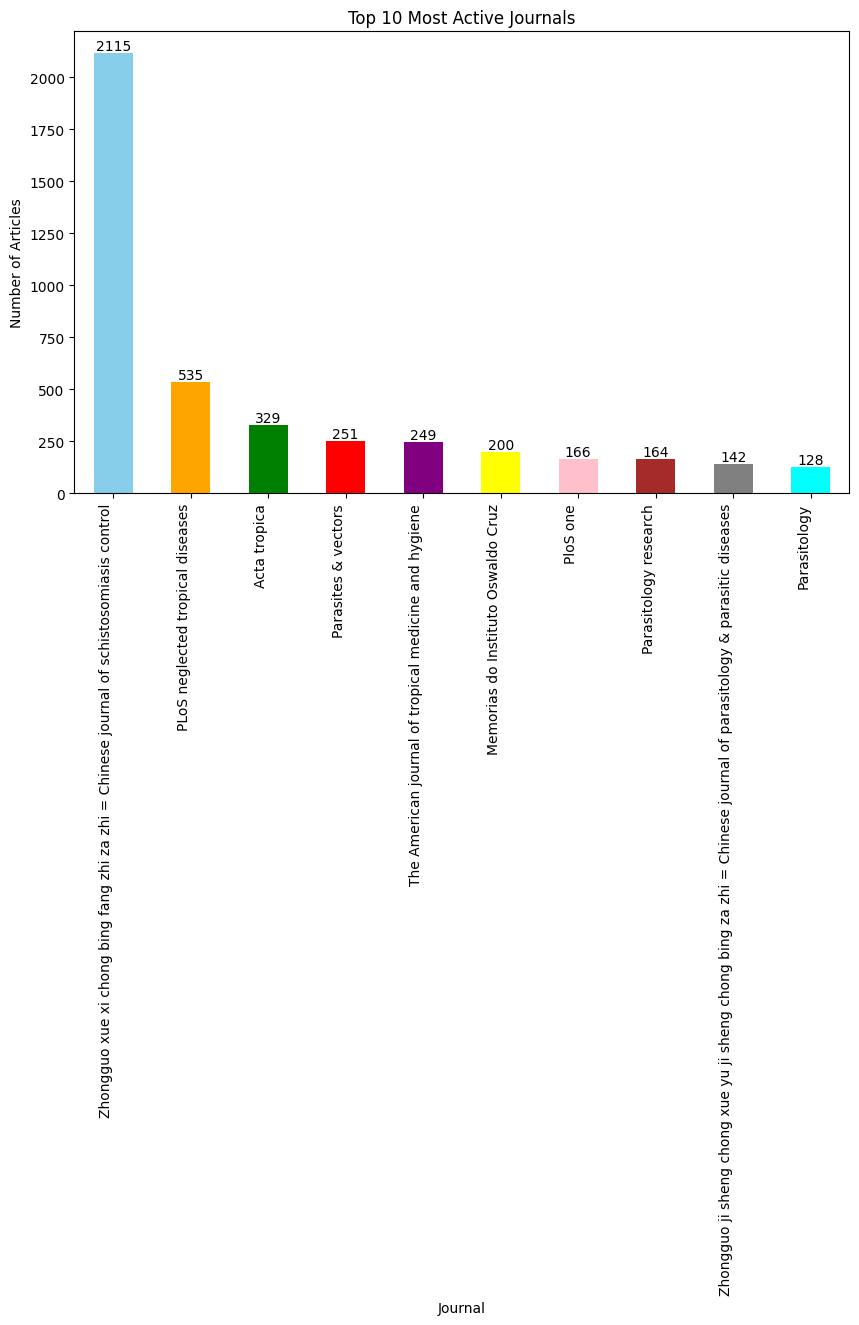

In [5]:
import plotly as px

Journal_counts = Data['Journal'].value_counts()



# Assuming you want to plot the top 10 most active journals
top_n = 10
top_Journals = Journal_counts.head(top_n)

colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan']

# Plotting
plt.figure(figsize=(10, 6))
top_Journals.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Active Journals')
plt.xlabel('Journal')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.show()

ax = top_Journals.plot(kind='bar', color= colors)

# Adding count labels on top of each bar
for i, count in enumerate(top_Journals):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

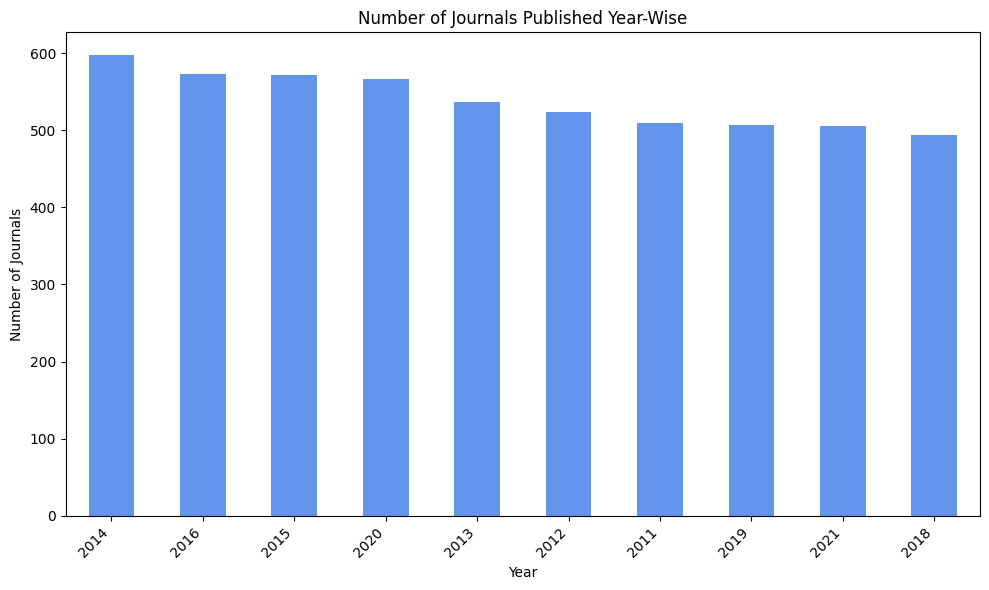

In [6]:
journals_by_year = Data['Year'].value_counts().sort_index()
top_10_years = journals_by_year.nlargest(10)
# Plotting
plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar', color='#6495ED')
plt.title('Number of Journals Published Year-Wise')
plt.xlabel('Year')
plt.ylabel('Number of Journals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

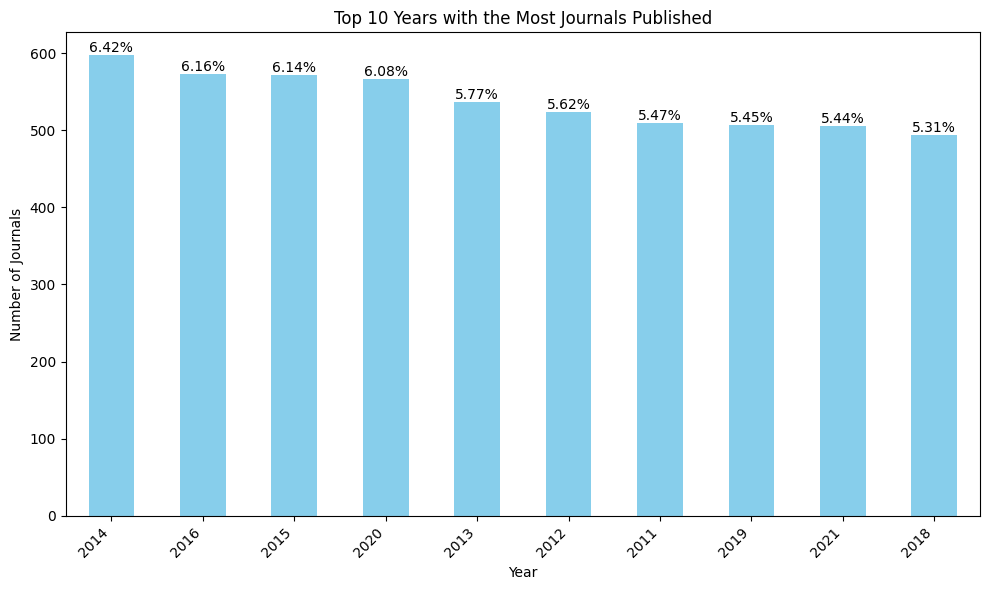

In [7]:
journals_by_year = Data['Year'].value_counts().sort_index()

# Select the top 10 years with the highest number of journals published
top_10_years = journals_by_year.nlargest(10)

# Calculate the total number of journals published
total_journals = journals_by_year.sum()

# Calculate the percentage of journals for each year
percentages = (top_10_years / total_journals) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = top_10_years.plot(kind='bar', color='skyblue')
plt.title('Top 10 Years with the Most Journals Published')
plt.xlabel('Year')
plt.ylabel('Number of Journals')
plt.xticks(rotation=45, ha='right')

# Annotate bars with percentages
for i, percentage in enumerate(percentages):
    plt.text(i, top_10_years.iloc[i], f"{percentage:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#! pip install pyvis

Yathin Burugamakaalli shivanna

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import IPython.display as ipd


In [ ]:
papercount_Data = pd.read_csv(r"C:\Users\YATHIN REDDY\Desktop\Skill Assesment 2\Skill_Assesment\paper_counts.csv")
Authors_Data  = pd.read_csv(r"C:\Users\YATHIN REDDY\Desktop\Skill Assesment 2\Skill_Assesment\authors.schistosomiasis.csv")
Articles_Data =  pd.read_csv(r"C:\Users\YATHIN REDDY\Desktop\Skill Assesment 2\Skill_Assesment\articles.schistosomiasis.csv")

In [ ]:
Authors_Data['AuthorAffiliation'] = Authors_Data['AuthorAffiliation'].ffill()

ipd.display(Authors_Data)


